This notebook illustrates the use of IQMetrics for Noice Power Spectrum, disk mtf and line-pair MTF.

In [2]:
!pip install matplotlib

  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
  Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (301 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00


In [3]:
import os, glob
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### NPS from a ACR-like Uniform module and patient background

Text(0, 0.5, 'Magnitude')

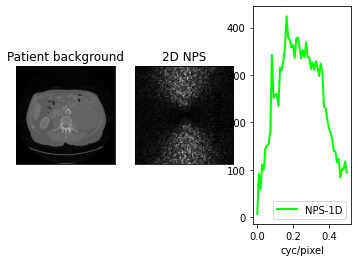

In [6]:

from npsengine import NPSAnalyzer      

file_path = './data/patient/I0_0800000__plain_isim_*_noisy.raw'

nps_calculator = NPSAnalyzer(file_path, nx=512, roi_size=80, roi_xy=(220, 320))


# Open file and read
try:
    with open('./data/patient/I0_0800000__plain_isim_001_noisy.raw', 'rb') as f:
        img = np.fromfile(f, dtype=np.int16).reshape((512, 512)).T
except FileNotFoundError:
    print(f"Cannot open file: {file_path}")

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Patient background')

# Plot 2D NPS and 1D radial profile
plt.subplot(1,3,2)    
plt.imshow(nps_calculator.get_2d_nps(), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('2D NPS')

plt.subplot(1,3,3)
fr, mc = nps_calculator.get_1d_nps()
plt.plot(fr, mc, label='NPS-1D', linewidth=2, color= "#00FF00")
plt.legend()
plt.xlabel('cyc/pixel')
plt.ylabel('Magnitude')            

Text(0, 0.5, 'Magnitude')

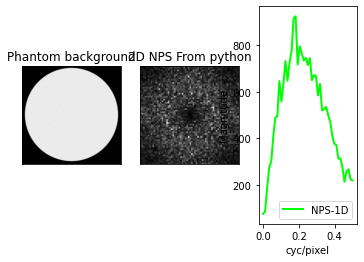

In [11]:

from npsengine import NPSAnalyzer      

file_path = './data/*uni.raw'

nps_calculator = NPSAnalyzer(file_path)

# Open file and read
try:
    with open('./data/I0_0072000_001noisy_uni.raw', 'rb') as f:
        img = np.fromfile(f, dtype=np.int16).reshape((320, 320)).T
except FileNotFoundError:
    print(f"Cannot open file: {file_path}")

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Phantom background')

# Plot 2D NPS and 1D radial profile
plt.subplot(1,3,2)    
plt.imshow(nps_calculator.get_2d_nps(), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('2D NPS From python')

plt.subplot(1,3,3)
fr, mc = nps_calculator.get_1d_nps()
plt.plot(fr, mc, label='NPS-1D', linewidth=2, color= "#00FF00")
plt.legend()
plt.xlabel('cyc/pixel')
plt.ylabel('Magnitude')            

### Disk MTF from ACR-like Phantom and  patient background

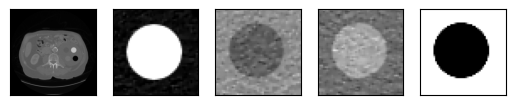

In [19]:
file_path = './data/patient/I0_0800000__disk_r12_disk_fbp.raw'
roi_pos = np.array([[219, 355], [220, 310], [270, 320], [270, 365]])  # Disk center coordinates 
hu_num = [1955, 905, 1120, 6]

roisz = 51
nx = 512

# Open file and read
try:
    with open(file_path, 'rb') as f:
        img = np.fromfile(f, dtype=np.int16).reshape((nx, nx)).T
except FileNotFoundError:
    print(f"Cannot open file: {file_path}")

plt.subplot(1,len(roi_pos)+1,1)
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

for i, (x, y) in enumerate(roi_pos):
    # Extract disk ROI
    #print((x_center + roi[:, None]) [0], (y_center + roi-2) [0])
    disk_img = img[x:x+roisz, y:y+roisz]
    plt.subplot(1,len(roi_pos)+1,i+2)
    plt.imshow(disk_img, cmap='gray', vmin=disk_img.mean()-disk_img.mean()/4, vmax=disk_img.mean()+disk_img.mean()/4)
    plt.xticks([])
    plt.yticks([])
    #break

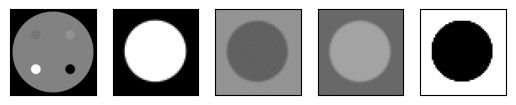

In [20]:
file_path = './data/fbp_module1_disk.raw'
roi_pos = np.array([[199, 71], [71, 71], [71, 199], [199, 199]])  # Disk center coordinates 
hu_num = [1955, 905, 1120, 6]

roisz = 51
nx = 320

# Open file and read
try:
    with open(file_path, 'rb') as f:
        img = np.fromfile(f, dtype=np.int16).reshape((nx, nx)).T
except FileNotFoundError:
    print(f"Cannot open file: {file_path}")

plt.subplot(1,len(roi_pos)+1, 1)
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

for i, (x, y) in enumerate(roi_pos):
    # Extract disk ROI
    #print((x_center + roi[:, None]) [0], (y_center + roi-2) [0])
    disk_img = img[x:x+roisz, y:y+roisz]
    plt.subplot(1,len(roi_pos)+1,i+2)
    plt.imshow(disk_img, cmap='gray', vmin=disk_img.mean()-disk_img.mean()/4, vmax=disk_img.mean()+disk_img.mean()/4)
    plt.xticks([])
    plt.yticks([])
    #break

In [21]:
from diskmtf import get_mtf_from_disk_edge, get_mtf_width

pixelsz = 0.6641  # mm (from makeCT_ACR_module1.m)


print(f"{'Disk HU':<10} {'MTF50%':<10} {'MTF20%':<10} {'MTF10%':<10}")
for i, (x, y) in enumerate(roi_pos):
    # Extract disk ROI
    disk_img = img[x:x+roisz, y:y+roisz] # "-2" is to readjust disk center

    mtf, freq, esf, success = get_mtf_from_disk_edge(disk_img)

    if success:
        freq_vector = freq / pixelsz  # Convert to cycles per mm
        print(" ".join([
            f"{hu_num[i]:<10}",
            f"{get_mtf_width(mtf, 0.5, freq_vector):<10.4f}",
            f"{get_mtf_width(mtf, 0.2, freq_vector):<10.4f}",
            f"{get_mtf_width(mtf, 0.1, freq_vector):<10.4f}"
        ]))
        
# FROM MATLAB
# Disk HU    MTF50%     MTF20%     MTF10%    
# 1955       0.5545     0.9034     1.1277 
# 905        0.5516     0.8990     1.1220   
# 1120       0.5529     0.9010     1.1246   
# 6          0.5542     0.9031     1.1272 

Disk HU    MTF50%     MTF20%     MTF10%    
1955       0.5545     0.9034     1.1277    
905        0.5516     0.8990     1.1220    
1120       0.5529     0.9010     1.1246    
6          0.5544     0.9033     1.1276    


Validating MTF from MATLAB legacy code and Python

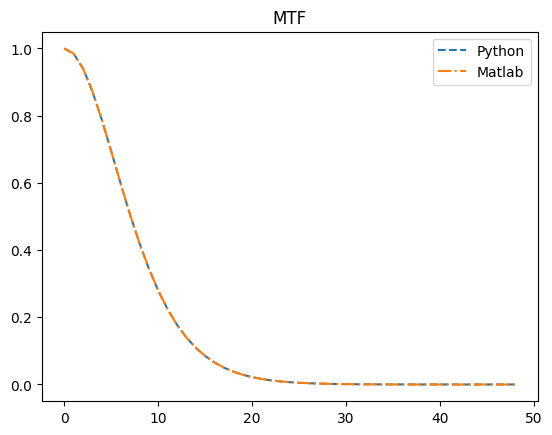

In [23]:


file_path = './data/fbp_module1_disk.raw'
roi_pos = np.array([[199, 71]])  # Disk center coordinates
hu_num = [1955]

roisz = 51
nx = 320

# Open file and read
try:
    with open(file_path, 'rb') as f:
        img = np.fromfile(f, dtype=np.int16).reshape((nx, nx)).T
except FileNotFoundError:
    print(f"Cannot open file: {file_path}")

#MTF from MATLAB
mtf_4matlab = [1.00000000000000,0.984616842489784,0.940331267302958,0.872258435867300,0.787540229002077,0.693858101100020,0.598170071770732,0.505944352497930,0.420909076736246,0.345178206645277,0.279573436238580,0.223997367183000,0.177771711028132,0.139904101559354,0.109278550470300,0.0847799028373410,0.0653675582476248,0.0501132372574656,0.0382149407459241,0.0289962022873878,0.0218970279048256,0.0164607867754037,0.0123197533034488,0.00918090976113765,0.00681288724338148,0.00503445117477399,0.00370464686543320,0.00271455166517147,0.00198049092630271,0.00143853595945713,0.00104009361035457,0.000748405875294290,0.000535795655171920,0.000381516048781358,0.000270082357685703,0.000189986459095353,0.000132711529052658,9.19809425294570e-05,6.31885392272077e-05,4.29685000265435e-05,2.88720893694676e-05,1.91257707111622e-05,1.24509755422085e-05,7.93035050563036e-06,4.90881456667805e-06,2.92031839516802e-06,1.63273052776652e-06,8.03726527750859e-07,2.42759106037358e-07]  

for i, (x, y) in enumerate(roi_pos):
    # Extract disk ROI
    disk_img = img[x:x+roisz, y:y+roisz] 
    
    mtf, freq, esf, success = get_mtf_from_disk_edge(disk_img)

    plt.plot(mtf, linestyle='--', label='Python')
    plt.plot(mtf_4matlab, linestyle='-.', label='Matlab')
    plt.legend()
    plt.title('MTF')
         

### LP-MTF from ACR-like Phantom and  patient background

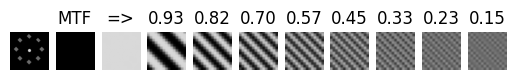

In [25]:
import glob
import numpy as np
import matplotlib.pyplot as plt

from lpmtf import *

file_path = './data/lp_340_fbp_module4.raw'

files = glob.glob(file_path)

nx = 320
roisz = 15
rois_xy = [[67,223], [36, 149], [67,  74], [142, 43], [216, 74], [247, 149], [216, 223], [142, 254]]
uni_xy = [100, 153]
con_xy = [153, 153]

img = read_image(files[0], nx)
plt.subplot(1,11,1)    
plt.imshow(img, cmap='gray', vmin=1000, vmax=1400)
plt.axis('off')

uni_roi = img[uni_xy[0]:uni_xy[0]+roisz, uni_xy[1]:uni_xy[1]+roisz]
plt.subplot(1,11,2)    
plt.imshow(uni_roi, cmap='gray', vmin=1000, vmax=1400)
plt.axis('off')
plt.title('MTF')
con_roi = img[con_xy[0]:con_xy[0]+roisz, con_xy[1]:con_xy[1]+roisz]
plt.subplot(1,11,3)    
plt.imshow(con_roi, cmap='gray', vmin=1000, vmax=1400)
plt.axis('off')
plt.title('=>')

for i, roi in enumerate(rois_xy):
    lp_roi = img[roi[0]:roi[0]+roisz, roi[1]:roi[1]+roisz]
    lp_mtf = calculate_mtf(lp_roi, uni_roi, con_roi)
    
    plt.subplot(1,11,i+4)    
    plt.imshow(lp_roi, cmap='gray', vmin=1000, vmax=1400)
    plt.axis('off')
    plt.title("{:.2f}".format(lp_mtf))


#### Line-pair in a patinet background

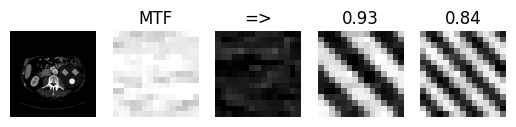

In [26]:
file_path = './data/patient/I0_0800000__lp_hu_340_Han2_05_lp_2_3fbp.raw'
files = glob.glob(file_path)

nx = 512
roisz = 15
rois_xy = [[240,  320], [240,  382]]
uni_xy = [293,  362]
con_xy = [260, 355]

img = read_image(files[0], nx, transpose=True)

plt.subplot(1,5,1)    
plt.imshow(img, cmap='gray', vmin=1000, vmax=1400) 
plt.axis('off')


uni_roi = img[uni_xy[0]:uni_xy[0]+roisz, uni_xy[1]:uni_xy[1]+roisz]
plt.subplot(1,5,2)    
plt.imshow(uni_roi, cmap='gray', vmin=1000, vmax=1400)
plt.axis('off')
plt.title('MTF')

con_roi = img[con_xy[0]:con_xy[0]+roisz, con_xy[1]:con_xy[1]+roisz]
plt.subplot(1,5,3)    
plt.imshow(con_roi, cmap='gray', vmin=1000, vmax=1400)
plt.axis('off')
plt.title('=>')

for i, roi in enumerate(rois_xy):
    lp_roi = img[roi[0]:roi[0]+roisz, roi[1]:roi[1]+roisz]
    lp_mtf = calculate_mtf(lp_roi, uni_roi, con_roi)

    plt.subplot(1,5,i+4)    
    plt.imshow(lp_roi, cmap='gray', vmin=1000, vmax=1400)
    plt.axis('off')
    plt.title("{:.2f}".format(lp_mtf))